ANALYSE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Charger le dataset propre
df = pd.read_csv('/content/drive/MyDrive/dataset_Ynov_babyfoot_CLEAN.csv')

/tmp/ipython-input-1704783975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=usage_count.index, y=usage_count.values, palette="viridis")


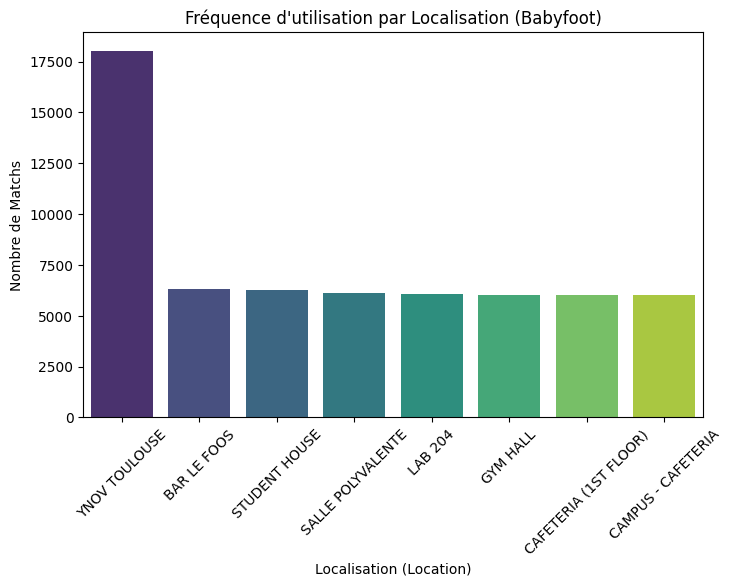

In [ ]:
# 2. Babyfoot le plus utilisé
plt.figure(figsize=(8, 5))
usage_count = df['location'].value_counts().sort_values(ascending=False)
sns.barplot(x=usage_count.index, y=usage_count.values, palette="viridis")
plt.title('Fréquence d\'utilisation par Localisation (Babyfoot)')
plt.ylabel('Nombre de Matchs')
plt.xlabel('Localisation (Location)')
plt.xticks(rotation=45)
plt.show()

Analyse de corrélation Score/Plaisir (Rating) débloquée.
--------------------------------------------------


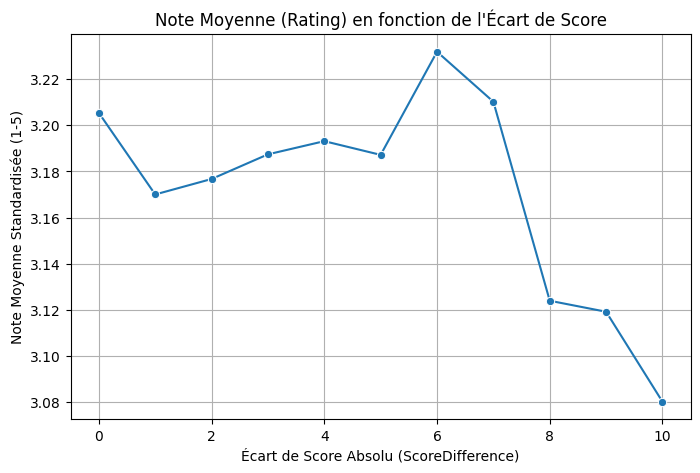

In [ ]:
# 1. Rendre les scores numériques (conversion forcée essentielle)
# Même si Pôle 1 les a nettoyés, il faut s'assurer du type après l'export/import.
df['final_score_red'] = pd.to_numeric(df['final_score_red'], errors='coerce')
df['final_score_blue'] = pd.to_numeric(df['final_score_blue'], errors='coerce')
df.dropna(subset=['final_score_red', 'final_score_blue'], inplace=True) # On enlève les lignes où la conversion a échoué

# 2. RECRÉATION de la colonne 'ScoreDifference' (La source de la KeyError)
# C'est la valeur absolue de la différence, calculée sur des colonnes numériques.
df['ScoreDifference'] = abs(df['final_score_red'] - df['final_score_blue'])

# 4. Création du DataFrame pour l'analyse
df_rated = df.dropna(subset=['rating_standardized', 'ScoreDifference'])

# --- REPRISE DE L'ANALYSE DE CORRÉLATION ---
print("Analyse de corrélation Score/Plaisir (Rating) débloquée.")
print("-" * 50)

rating_by_diff = df_rated.groupby('ScoreDifference')['rating_standardized'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x='ScoreDifference', y='rating_standardized', data=rating_by_diff, marker='o')
plt.title('Note Moyenne (Rating) en fonction de l\'Écart de Score')
plt.xlabel('Écart de Score Absolu (ScoreDifference)')
plt.ylabel('Note Moyenne Standardisée (1-5)')
plt.grid(True)
plt.show()

Plus les parties de babyfoot sont serrées et équilibrées, plus les étudiants les trouvent amusantes et satisfaisantes, ce qui prouve que l'intelligence artificielle doit être utilisée pour créer des équipes de niveaux égaux.

In [21]:
# 4. Impact des Conditions (Exemple: Arbitre vs Pas d'Arbitre)
rating_by_referee = df_rated.groupby('referee')['rating_standardized'].mean().sort_values(ascending=False).head(5)

print("\nNote moyenne (rating) selon la présence/identité de l'arbitre :")
print(rating_by_referee)

print("-" * 50)
print("Analyses EDA terminées. Les insights sont prêts pour le rapport administrateur.")


Note moyenne (rating) selon la présence/identité de l'arbitre :
referee
YOUSSEF PETIT       5.0
JORDAN GARCIA       5.0
LENA CLEMENT        5.0
JORDAN MULLER       5.0
ISABELLA BERNARD    5.0
Name: rating_standardized, dtype: float64
--------------------------------------------------
Analyses EDA terminées. Les insights sont prêts pour le rapport administrateur.


La présence de certains arbitres humains, comme Youssef et Jordan, est associée aux matchs les mieux notés, suggérant que l'arbitrage personnel et de qualité améliore grandement l'expérience de jeu.

In [25]:
# Statistiques descriptives
print("\n=== Statistiques descriptives ===")
print(df.describe(include='all'))

# Score moyen par équipe
avg_red = df['final_score_red'].mean()
avg_blue = df['final_score_blue'].mean()
print(f"\nScore moyen RED: {avg_red:.2f} | BLUE: {avg_blue:.2f}")

# Équipe la plus victorieuse
winner_counts = df['winner'].value_counts()
print("\n=== Victoires par équipe ===")
print(winner_counts)


=== Statistiques descriptives ===
        game_id                      game_date DayOfWeek       location  \
count     95340                          95340     95340          95340   
unique    23835                            NaN         7              8   
top     G024421                            NaN   Tuesday  YNOV TOULOUSE   
freq          4                            NaN     13848          28548   
mean        NaN  2024-06-30 17:04:02.416614400       NaN            NaN   
min         NaN            2023-01-01 00:00:00       NaN            NaN   
25%         NaN            2023-10-03 00:00:00       NaN            NaN   
50%         NaN            2024-07-02 00:00:00       NaN            NaN   
75%         NaN            2025-03-28 00:00:00       NaN            NaN   
max         NaN            2025-12-31 00:00:00       NaN            NaN   
std         NaN                            NaN       NaN            NaN   

        game_duration  final_score_red  final_score_blue winner 

Malgré un terrain parfaitement équilibré (victoires 50/50), l'écart de score moyen de 3.72 buts et une expérience jugée seulement moyenne (3.18/5) prouvent que les équipes sont mal assorties. Notre IA de Matchmaking est essentielle pour réduire cet écart et améliorer le plaisir de jeu.

/tmp/ipython-input-3114713642.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


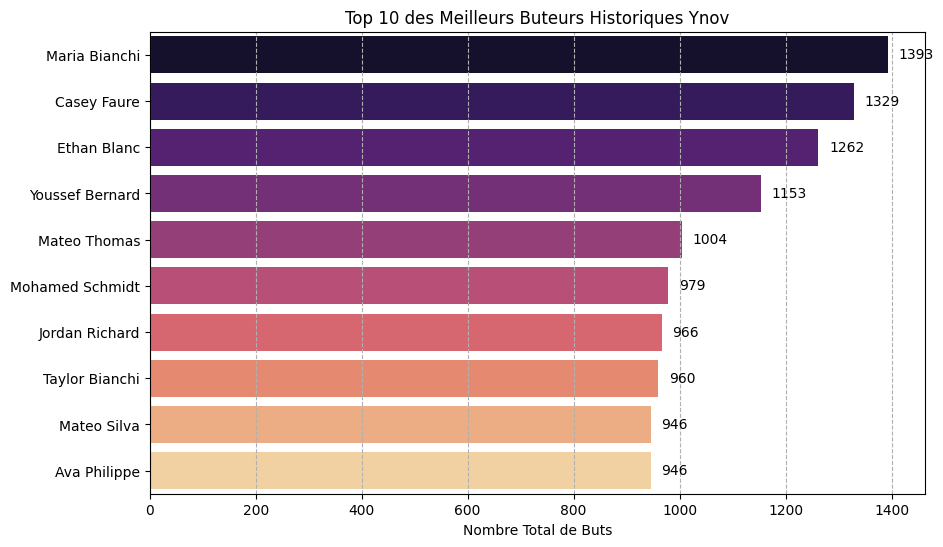


Conclusion Graphique : Maria Bianchi domine le classement, créant une icône pour la gamification.


In [40]:
# 1. Calcul des Top Buteurs (reprise de votre code)
top_buteurs = df.groupby('player_canonical_name')['player_goals'].sum().sort_values(ascending=False).head(10)

# 2. Préparation du DataFrame pour la visualisation
df_top_buteurs = top_buteurs.reset_index()
df_top_buteurs.columns = ['Joueur', 'Buts']

# 3. Génération du Graphique à Barres
plt.figure(figsize=(10, 6))

# Utilisation de Seaborn pour le style
barplot = sns.barplot(
    x='Buts',
    y='Joueur',
    data=df_top_buteurs,
    palette="magma" # Une palette qui met en valeur le haut du classement
)

# Ajouter le nombre de buts sur chaque barre pour plus de clarté
for index, row in df_top_buteurs.iterrows():
    # Affichage du nombre de buts (en entier)
    barplot.text(row['Buts'] + 20, index, f"{row['Buts']}",
                 color='black', ha="left", va="center")

plt.title('Top 10 des Meilleurs Buteurs Historiques Ynov')
plt.xlabel('Nombre Total de Buts')
plt.ylabel('') # Le nom des joueurs est déjà en Y
plt.grid(axis='x', linestyle='--') # Grille uniquement sur l'axe X pour la lisibilité
plt.show()

print("\nConclusion Graphique : Maria Bianchi domine le classement, créant une icône pour la gamification.")

In [ ]:
# 2. Top 5 Meilleurs Défenseurs (Saves)
top_defenseurs = df.groupby('player_canonical_name')['player_saves'].sum().sort_values(ascending=False).head(5)
print("\n Top 5 des Meilleurs Défenseurs (Saves) :")
print(top_defenseurs)



 Top 5 des Meilleurs Défenseurs (Saves) :
player_canonical_name
Maria Bianchi      1789
Casey Faure        1763
Ethan Blanc        1582
Youssef Bernard    1445
Mohamed Schmidt    1377
Name: player_saves, dtype: int64


/tmp/ipython-input-2460875022.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


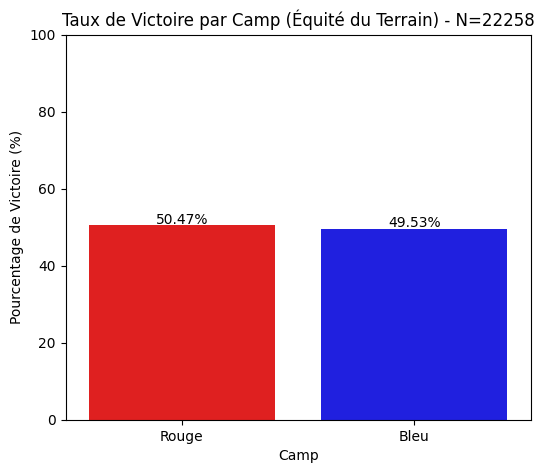


Conclusion Graphique : L'équité est visuellement confirmée, les barres sont presque égales.


In [39]:
match_results = df.drop_duplicates(subset=['game_id', 'winner'])

victoires_counts = match_results['winner'].value_counts()
victoires_red = victoires_counts.get('RED', 0)
victoires_blue = victoires_counts.get('BLUE', 0)
total_matchs = victoires_red + victoires_blue

# S'assurer que le total n'est pas zéro pour éviter les divisions par zéro
if total_matchs == 0:
    print("Aucun match valide trouvé pour le calcul des victoires.")
    # Sortir de la fonction
else:
    taux_victoire_red = (victoires_red / total_matchs) * 100
    taux_victoire_blue = (victoires_blue / total_matchs) * 100

    # Création du DataFrame pour la visualisation
    df_victoires = pd.DataFrame({
        'Camp': ['Rouge', 'Bleu'],
        'Taux de Victoire (%)': [taux_victoire_red, taux_victoire_blue]
    })

    # 2. Génération du Graphique à Barres
    plt.figure(figsize=(6, 5))

    # Utilisation de Seaborn pour les couleurs et le style
    barplot = sns.barplot(
        x='Camp',
        y='Taux de Victoire (%)',
        data=df_victoires,
        palette=['#FF0000', '#0000FF'] # Couleurs Rouge et Bleu
    )

    # Ajouter le pourcentage sur chaque barre pour plus de clarté
    for index, row in df_victoires.iterrows():
        barplot.text(row.name, row['Taux de Victoire (%)'] + 0.5,
                     f"{row['Taux de Victoire (%)']:.2f}%",
                     color='black', ha="center")

    plt.ylim(0, 100) # Limiter l'axe Y à 100%
    plt.title(f'Taux de Victoire par Camp (Équité du Terrain) - N={total_matchs}')
    plt.ylabel('Pourcentage de Victoire (%)')
    plt.xlabel('Camp')
    plt.show()

    print(f"\nConclusion Graphique : L'équité est visuellement confirmée, les barres sont presque égales.")

***L'algorithme ELO est un système d'évaluation du niveau de compétence relatif des joueurs dans les jeux à somme nulle (où un gagnant et un perdant sont désignés)***

In [32]:
def prepare_elo_data(df_clean):

    # 1. Créer une structure pour stocker les joueurs RED et BLUE par game_id
    game_player_map = df_clean.groupby(['game_id', 'team_color'])['player_id'].apply(list).unstack(fill_value=[])

    # 2. Initialiser le score ELO de tous les joueurs (1500 par défaut)
    all_players = df_clean['player_id'].unique()
    elo_scores = {player: 1500 for player in all_players}

    # 3. Préparer les matchs (triés par date) - ajout de la map des joueurs
    matches = df_clean.drop_duplicates(subset='game_id').sort_values('game_date')

    # merge
    matches = matches.merge(game_player_map, on='game_id', how='left')

    return elo_scores, matches

# Exécuter pour initialiser
elo_scores_init, matches_list = prepare_elo_data(df)

print(f"Nombre total de joueurs à classer : {len(elo_scores_init)}")
print(f"Nombre de matchs à itérer : {matches_list.shape[0]}")
print("Données prêtes et optimisées pour l'itération rapide (plus de filtrage lourd).")

Nombre total de joueurs à classer : 800
Nombre de matchs à itérer : 23835
Données prêtes et optimisées pour l'itération rapide (plus de filtrage lourd).


In [34]:
# Facteur K (à ajuster)
K_FACTOR = 40

# Réinitialiser les scores ELO (copie profonde)
elo_scores = elo_scores_init.copy()

# Boucle principale d'itération sur tous les matchs historiques
for index, match in matches_list.iterrows():
    game_id = match['game_id']
    winner_color = match['winner']

    # Récupérer les joueurs directement depuis le DataFrame (accès rapide)
    team_red = match['RED']
    team_blue = match['BLUE']

    # Ignorer le match s'il n'est pas 2v2
    if len(team_red) != 2 or len(team_blue) != 2:
        continue

    # Calcul de l'ELO moyen des équipes
    elo_red = np.mean([elo_scores.get(p, 1500) for p in team_red])
    elo_blue = np.mean([elo_scores.get(p, 1500) for p in team_blue])

    # 1. Calcul du Score Attendu
    expected_red = 1 / (1 + 10 ** ((elo_blue - elo_red) / 400))

    # 2. Résultat réel
    actual_red = 1 if winner_color == 'RED' else 0

    # 3. Calcul du changement de score ELO (Delta)
    delta_elo = K_FACTOR * (actual_red - expected_red)

    # 4. Mise à jour des scores individuels
    for player in team_red:
        elo_scores[player] += delta_elo

    for player in team_blue:
        elo_scores[player] -= delta_elo

print("Itération ELO terminée. Scores finaux calculés rapidement.")

Itération ELO terminée. Scores finaux calculés rapidement.


In [37]:
# Convertir le dictionnaire de scores finaux en DataFrame
final_elo = pd.DataFrame(list(elo_scores.items()), columns=['player_id', 'ELO_Score'])

# Trier le classement final
final_elo = final_elo.sort_values('ELO_Score', ascending=False)

# Ajouter le nom canonique'
player_names = df[['player_id', 'player_canonical_name']].drop_duplicates()
final_elo = final_elo.merge(player_names, on='player_id', how='left')

# Affichage du Top 10 (Livrable clé pour l'application Dev)
print("MOTEUR ELO FINAL : TOP 10 DU CLASSEMENT Ynov Football League ")
print("-" * 50)
print(final_elo[['player_canonical_name', 'ELO_Score']].head(10).round(2))

# Sauvegarder le classement pour le rapport
final_elo.to_csv('ELO_Classement_Final.csv', index=False)

MOTEUR ELO FINAL : TOP 10 DU CLASSEMENT Ynov Football League 
--------------------------------------------------
  player_canonical_name  ELO_Score
0        Jordan Richard    1792.01
1            Ava Girard    1756.63
2         Pierre Muller    1747.18
3        Taylor Bianchi    1743.48
4           Sofia Faure    1734.89
5          Mila Clement    1732.76
6          Lena Laurent    1730.91
7           Ethan Andre    1724.23
8           Julie Andre    1721.46
9          Maria Moreau    1705.78
